<a href="https://colab.research.google.com/github/kripperda/MLA_KMR/blob/main/MLA1_KMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Assignment 1
Kory Ripperda
CS430-ON
Machine Learning in the Cloud

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import drive

Mount to Google Drive

In [75]:
# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


File Path to Google Drive

In [76]:
# Path to file in Google Drive
df = pd.read_csv('/content/drive/MyDrive/weather_2012.csv')

# Read the file into a DataFrame named 'df'
df = pd.read_csv('/content/drive/MyDrive/weather_2012.csv')

df.sample(5)


,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
5388,8/12/2012 12:00,24.4,16.9,63,17,48.3,100.67,Mainly Clear
2750,4/24/2012 14:00,8.0,0.5,59,28,24.1,99.01,Cloudy
8501,12/20/2012 5:00,-1.1,-3.9,81,13,25.0,101.78,Cloudy
4096,6/19/2012 16:00,27.7,19.0,59,17,24.1,100.87,Mostly Cloudy
6572,9/30/2012 20:00,11.6,11.6,100,9,8.0,100.00,"Rain,Fog"


First 5 rows, last 5 rows, and random 5 rows

In [77]:
# Display first 5 rows, last 5 rows, and 5 random rows
print("First 5 rows: \n", df.head())
print("Last 5 rows: \n", df.tail())
print("5 Random rows: \n", df.sample(5))

First 5 rows: 
        Date/Time  Temp (C)  Dew Point Temp (C)  Rel Hum (%)  Wind Spd (km/h)  \
0  1/1/2012 0:00      -1.8                -3.9           86                4   
1  1/1/2012 1:00      -1.8                -3.7           87                4   
2  1/1/2012 2:00      -1.8                -3.4           89                7   
3  1/1/2012 3:00      -1.5                -3.2           88                6   
4  1/1/2012 4:00      -1.5                -3.3           88                7   

   Visibility (km)  Stn Press (kPa)               Weather  
0              8.0           101.24                   Fog  
1              8.0           101.24                   Fog  
2              4.0           101.26  Freezing Drizzle,Fog  
3              4.0           101.27  Freezing Drizzle,Fog  
4              4.8           101.23                   Fog  
Last 5 rows: 
              Date/Time  Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
8779  12/31/2012 19:00       0.1                -2.7       

All Column names

In [78]:
# List all column names
print("Column names:", list(df.columns))

Column names: ['Date/Time', 'Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)', 'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Weather']


Rename Columns

In [79]:
# Rename columns
new_names = {'Date/Time': 'date_time', 'Temp (C)': 'temp_c', 'Dew Point Temp (C)': 'dew_point', 'Rel Hum (%)': 'relative_humidity', 'Wind Spd (km/h)': 'wind_speed', 'Visibility (km)': 'visibility', 'Stn Press (kPa)': 'pressure', 'Weather': 'weather'}
df = df.rename(columns=new_names)

Basic Statistics

In [80]:
# Basic statistics
print("Descriptive statistics: \n", df.describe())

Descriptive statistics: 
             temp_c    dew_point  relative_humidity   wind_speed   visibility  \
count  8784.000000  8784.000000        8784.000000  8784.000000  8784.000000   
mean      8.798144     2.555294          67.431694    14.945469    27.664447   
std      11.687883    10.883072          16.918881     8.688696    12.622688   
min     -23.300000   -28.500000          18.000000     0.000000     0.200000   
25%       0.100000    -5.900000          56.000000     9.000000    24.100000   
50%       9.300000     3.300000          68.000000    13.000000    25.000000   
75%      18.800000    11.800000          81.000000    20.000000    25.000000   
max      33.000000    24.400000         100.000000    83.000000    48.300000   

          pressure  
count  8784.000000  
mean    101.051623  
std       0.844005  
min      97.520000  
25%     100.560000  
50%     101.070000  
75%     101.590000  
max     103.650000  


Add Temperature in Fahrenheit

In [81]:
# Add temperature in Fahrenheit
df['temp_f'] = (df['temp_c'] * (9/5)) + 32

Rearrange Columns

In [82]:
# Rearrange columns
cols = list(df.columns)
cols.insert(cols.index('temp_c'), 'temp_f')
df = df[cols]

Check Data Types

In [83]:
# Check data types
print("Data types: \n", df.dtypes)

Data types: 
 date_time             object
temp_f               float64
temp_c               float64
dew_point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
weather               object
temp_f               float64
dtype: object


Convert Date and Time

In [84]:
# Convert date_time to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])
print("Date time conversion successful:", pd.to_datetime(df['date_time']).dtype)

Date time conversion successful: datetime64[ns]


Calculate Average Temperature per Month

In [85]:
# Calculate average temperature per month
monthly_avg = df.groupby(df['date_time'].dt.month)['temp_f'].mean()

Plot Temp vs. Relative Humidity

ValueError: x and y must be the same size

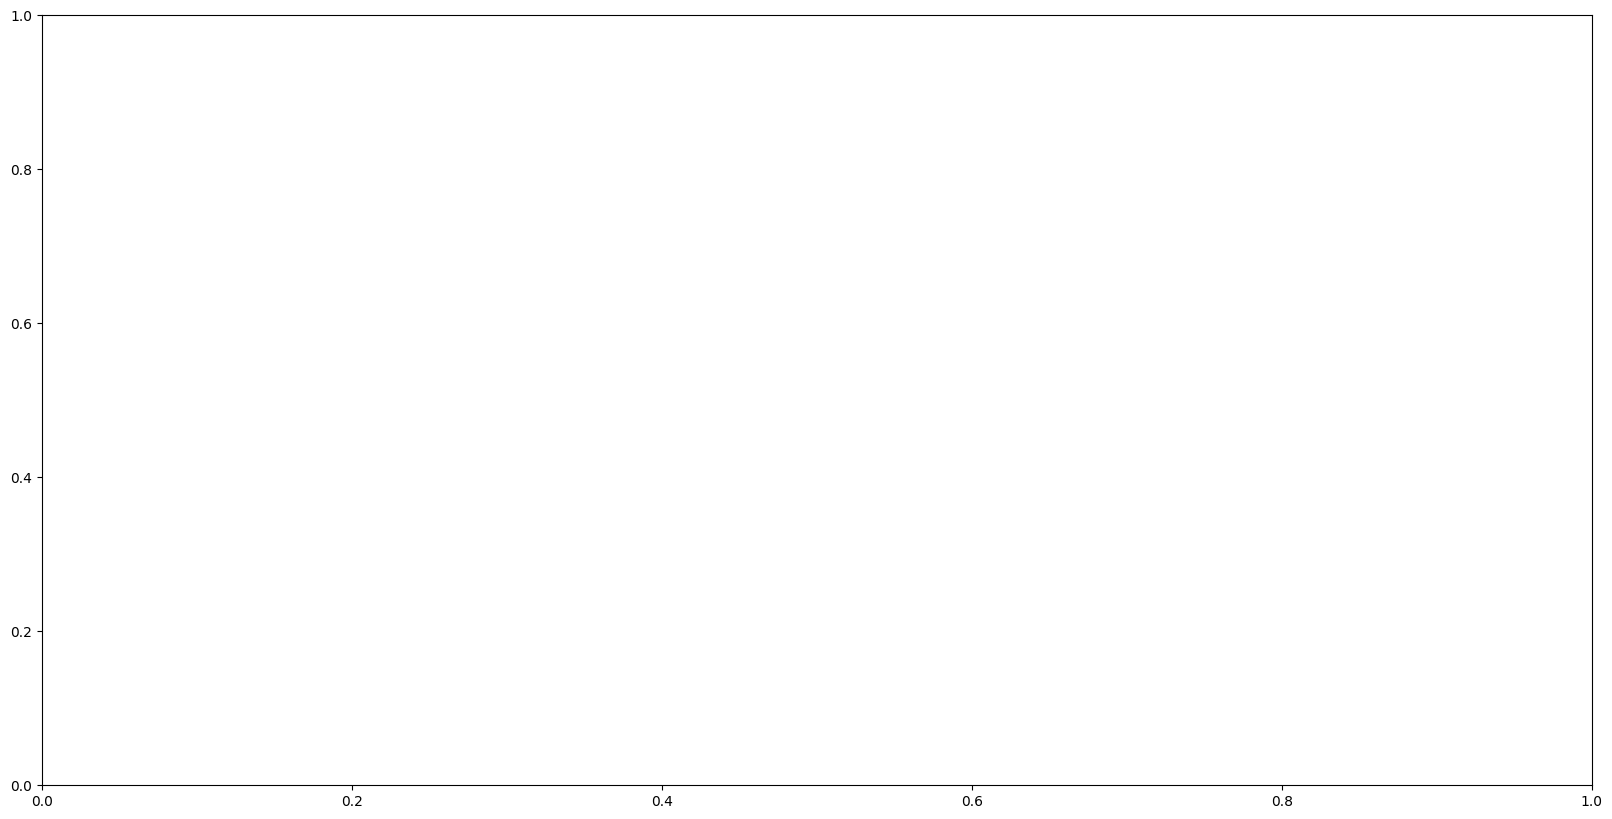

In [86]:
# Plot temperature vs relative humidity scatterplot
plt.figure(figsize=(20, 10))
plt.scatter(df['relative_humidity'], df['temp_f'])
plt.xlabel("Relative Humidity")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs Relative Humidity")
plt.show()

Plot Avg. Temp. per Month

In [ ]:
# Plot average temperature per month line chart
plt.figure(figsize=(20, 10))
monthly_avg.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Average Temperature (F)')
plt.show()

Box Plot

In [ ]:
# Plot boxplot
plt.figure(figsize=(20, 10))
df.boxplot(column='temp_f', by=df['date_time'].dt.month)
plt.xlabel('Month')
plt.ylabel('Temperature (F)')
plt.show()
